In [13]:
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras import utils
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D
from keras import Sequential, optimizers
from keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from keras.utils import to_categorical


In [2]:
#Prepare the data
(X_train, y_train), (X_test,y_test)=fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float64)
X_train=X_train/255.
X_test=X_test/255.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

num_classes = 10
y_train_ = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_train = utils.to_categorical(y_train, num_classes)

In [8]:
sgd = optimizers.SGD(lr=0.03, momentum=0.9, nesterov=True)

x=Input((28,28,1))
h=Conv2D(10, (3,3), activation='relu')(x)
h=MaxPool2D(2, strides=1)(h)

h=Flatten()(h)
h=Dense(15, activation='relu')(h)
h=Dense(15, activation='relu')(h)
h=Dense(10, activation='softmax')(h)
conv=Model(x,h)
conv.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
conv.fit(X_train, y_train, epochs=10,batch_size=128, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 213us/step - loss: 0.6635 - acc: 0.7555 - val_loss: 0.4465 - val_acc: 0.8361
Epoch 2/10
50000/50000 [==============================] - 11s 211us/step - loss: 0.3699 - acc: 0.8687 - val_loss: 0.3389 - val_acc: 0.8809
Epoch 3/10
50000/50000 [==============================] - 11s 213us/step - loss: 0.3161 - acc: 0.8870 - val_loss: 0.3078 - val_acc: 0.8884
Epoch 4/10
50000/50000 [==============================] - 10s 208us/step - loss: 0.2892 - acc: 0.8971 - val_loss: 0.3174 - val_acc: 0.8872
Epoch 5/10
50000/50000 [==============================] - 10s 209us/step - loss: 0.2681 - acc: 0.9040 - val_loss: 0.3171 - val_acc: 0.8861
Epoch 6/10
50000/50000 [==============================] - 10s 205us/step - loss: 0.2509 - acc: 0.9094 - val_loss: 0.2948 - val_acc: 0.8939
Epoch 7/10
50000/50000 [==============================] - 10s 206us/step - loss: 0.2352 - acc: 0.9146 - val_loss: 0.

In [10]:

# load the model
model = VGG16(include_top=True,weights='imagenet')


[[('n07768694', 'pomegranate', 0.15228738), ('n07745940', 'strawberry', 0.13413206), ('n07753592', 'banana', 0.09721087), ('n07749582', 'lemon', 0.0904393), ('n03482405', 'hamper', 0.0831982)]]


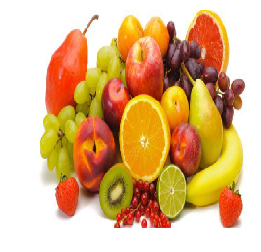

In [11]:
# load an image from file
testimage = load_img('fruits.jpg', target_size=(224, 224))
testimage = img_to_array(testimage)
plt.imshow(testimage/testimage.max())
plt.axis('off')
testimage = testimage.reshape((1, testimage.shape[0], testimage.shape[1], testimage.shape[2]))
testimage = preprocess_input(testimage)
prediction = model.predict(testimage)
label = decode_predictions(prediction)
print(label)

In [14]:
#Load dataset. mountain bikes=[1,0], road bikes=[0,1]
X=[]
y=[]
for i in range(105):
    path='bikes\mountain_bikes\mountain_bike_'+str(i)+'.jpg'

    image = load_img(path, target_size=(224, 224))
    image = img_to_array(image)
    #image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    #image=np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    X.append(image)
    #y.append([1,0])
    y.append(1)
    
for j in range(106):
    path='bikes\\road_bikes\\road_bike_'+str(j)+'.jpg'

    #path='bikes\road_bikes\road_bike_'+str(j)+'.jpg'
    image = load_img(path, target_size=(224, 224))
    image = img_to_array(image)
    #image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    #image=np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    X.append(image)
    #y.append([0,1])
    y.append(0)

X=np.array(X)
#y=np.array(y)
y=to_categorical(y,2)


In [15]:
X_trainval, X_test, y_trainval, y_test=train_test_split(X,y, train_size=0.7, random_state=0)
X_train, X_val,y_train, y_val=train_test_split(X_trainval,y_trainval, train_size=0.7, random_state=0)


In [16]:


vgg16 = VGG16(weights='imagenet', include_top=False)
vgg16.summary()

inp = Input((224,224,3,))

output_vgg16_conv = vgg16(inp)

x = Flatten()(output_vgg16_conv)
x=Dense(30, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

bikemodel = Model(inp,x)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
sgd = optimizers.SGD(lr=0.01)

bikemodel.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
bikemodel.fit(X_train, y_train, epochs=2,validation_data=(X_val, y_val))

Train on 102 samples, validate on 45 samples
Epoch 1/2
102/102 [==============================] - 145s 1s/step - loss: 8.8492 - acc: 0.4510 - val_loss: 6.8054 - val_acc: 0.5778
Epoch 2/2
102/102 [==============================] - 147s 1s/step - loss: 8.8492 - acc: 0.4510 - val_loss: 6.8054 - val_acc: 0.5778


I get the same validation accuracy for every epochs. There must be something wrong with the programming of the NN (wrong form for y or unadapted activation function or badly configured optimiser?)

In [19]:
def d(inp):
    y=inp[np.newaxis,...]
    return y

def whichbike(arr):
    mtb_proba=arr[0]
    road_proba=[1]
    print("Mountain bike: %f \n Road bike: %g" %(mtb_proba, road_proba))

In [20]:
bikemodel.predict(X_test)

array([[1.5993160e-26, 1.0000000e+00],
       [8.9047266e-27, 1.0000000e+00],
       [2.3844111e-33, 1.0000000e+00],
       [1.9468293e-31, 1.0000000e+00],
       [3.9185448e-27, 1.0000000e+00],
       [2.8364138e-32, 1.0000000e+00],
       [8.0561846e-17, 1.0000000e+00],
       [4.2691740e-29, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [8.8076998e-27, 1.0000000e+00],
       [1.5343732e-18, 1.0000000e+00],
       [9.7815732e-34, 1.0000000e+00],
       [2.4938812e-17, 1.0000000e+00],
       [2.9909505e-10, 1.0000000e+00],
       [1.4775389e-36, 1.0000000e+00],
       [7.5262377e-21, 1.0000000e+00],
       [4.9074048e-35, 1.0000000e+00],
       [1.8816998e-07, 9.9999976e-01],
       [1.5867731e-11, 1.0000000e+00],
       [6.2521136e-31, 1.0000000e+00],
       [1.7208896e-33, 1.0000000e+00],
       [4.5404065e-21, 1.0000000e+00],
       [8.8656795e-27, 1.0000000e+00],
       [2.3415784e-17, 1.0000000e+00],
       [4.1619244e-19, 1.0000000e+00],
       [1.3632367e-27, 1.

In [21]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

The model predicts everything to be the same...